<a href="https://colab.research.google.com/github/HarolReyes0/Life_Expectancy/blob/main/ProyectoSIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importacion de librerias.

* Pandas: Libreria de manipulacion de datos.  [Documentacion](https://pandas.pydata.org/docs/reference/frame.html)

* Numpy: Libreria de manipulacion de arreglos y matrices. [Documentacion](https://numpy.org/doc/stable/reference/routines.statistics.html)
* Matplotlib: Libreria de diseño y creacion de visualizaciones de bajo nivel.  [Documentacion](https://matplotlib.org/stable/api/pyplot_summary.html)
* Seaborn: Libreria de diseño y creacion de visualizaciones de alto nivel.
[Documentacion](https://seaborn.pydata.org/api.html)
* Statsmodel: Libreria de herrameintas estadisticas. [Documentacion](https://www.statsmodels.org/stable/glm.html)


In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px

# Diseño de las figuras.

In [ ]:
colores = ['#142ca4', '#6c7194', '#0a165c', '#7c8acc', '#bb99ff',]
#-------------------------------------------------------------------------------
#Configuracion de colores                                                      |
#-------------------------------------------------------------------------------
mpl.rcParams['axes.facecolor'] = '#f5f5f0' #Color de fondo.
mpl.rcParams['axes.edgecolor'] = '#ebebe0' #Color del marco.
mpl.rcParams['axes.labelcolor'] = '#070707' #Color de las letras.
#Color de relleno de las figuras.
mpl.rcParams['axes.prop_cycle'] =  plt.cycler(color= colores)
#-------------------------------------------------------------------------------
#Configuracion de la fuente                                                    |
#-------------------------------------------------------------------------------
mpl.rcParams['font.family'] = 'DejaVu Serif' #Font para las letras.
mpl.rcParams['axes.labelsize'] = '12.5' #Tamaño de las etiquetas.
mpl.rcParams['axes.titlesize'] = '17' #Tamaño del titulo
mpl.rcParams['axes.titleweight'] = '17' #Anchura del titulo.
mpl.rcParams['figure.labelsize'] = '6.5' #Tamaño de las etiquetas de los ejes.

mpl.rcParams['figure.figsize'] = (10,6) #Tamaño de la figura.
mpl.rcParams['axes.axisbelow'] = True

# Importacion de la data.

## Origen de los datos:
Los datos utilizados en este proyecto fueron recopilados de Kaggle, una plataforma conocida por albergar conjuntos de datos diversos y relevantes para la comunidad científica y de análisis de datos. En este caso, se utilizó una recopilación de observaciones proporcionada por la Organización Mundial de la Salud (OMS), que se encuentra disponible en los siguientes enlaces: enlace al [dataset](https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated).

Este conjunto de datos abarcan información de múltiples países durante el
periodo comprendido entre los años 2000 y 2015. Esta extensiva gama temporal permite un análisis significativo de las tendencias y patrones relacionados con la expectativa de vida en distintas regiones del mundo a lo largo de los años.


In [ ]:
#Link de alojamiento de los datos.
dataset = 'https://drive.usercontent.google.com/download?id=1QEx5fwcxiWKOrqbE_hypk7LAUIeV5Q-i'

#Lectura de los csv guardados en los links.
df = pd.read_csv(dataset)

#Exploracion de la estructura.

## Diccionario de datos:    
   
|Variable|Definición|   
|----------|------|
|Country|País donde fue recolectada la data.|   
|Year|Año en el que fue recolectada la data.|
|Under_five_deaths|Muerte de niños por debajo de 5 años por cada 1000 personas.|
|Status|Estado de la economía del pais.|   
|Life expectancy|Expectativa de vida.|   
|Adult Mortality|Tasas de mortalidad adulta de ambos sexos (probabilidad de morir entre los 15 y 60 años por cada 1000 personas de la población).|   
|infant deaths|Tasa de muerte de infantes por cada 1000 personas (entre 5 y 14 años).|   
|Alcohol| Consumo de alcohol de personas mayores a 15 años medidas en litros.|   
|percentage expenditure|Expenditure on health as a percentage of Gross Domestic Product per capita(%)|   
|Hepatitis B|Cobertura de inmunización contra la Hepatitis B (HepB) entre niños de 1 año (%).|   
|Measles|Sarampión: número de casos reportados por cada 1000 habitantes.|
|BMI|Indice de masa corporal.|   
|Polio|Porcentaje de niños de 1 año inmunizados contra la polio.|   
|Diphtheria|Cobertura de inmunización contra difteria, tétanos y tos ferina (DTP3) entre niños de 1 año (%).|
|Incidents_HIV|Indices de VIH entre las edades de 15 a 49 años por 1000 habitantes.|
|GDP_per_capita|Producto interno bruto.|
|Population_ml|Poblacion en millones.|
|Thinness_ten_nineteen_years|Delgadez en personas de diez a diecinueve años.|
|Thinness_five_nine_years|Delgadez en personas de cinco a diez años.|
|Schooling|Promedio de numero de dias utilizado en educacion.|
|Economy_status_Developed|Economia desarrollada.|
|Economy_status_Developing|Economia en desarrollo.|
|Life_expectancy |Expectativa de vida|



# Objetivo

El propósito principal de este análisis exploratorio es identificar las características que tienen un mayor impacto en la esperanza de vida en los paises del continiente americano.

## Estructura del dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

#Limpieza de la data


* El dataframe no cuenta con valores faltantas por lo que la imputación no será necesaria.
* Cada variable tiene un formato regularizado por lo que no es necesario regularizar la data.
* Los tipos de datos estan asignados correctamente por lo que no hay que hacer cambios en el tipado de los datos.

#Analisis de la data

## Filtrado del dataframe

In [ ]:
paises = [
    "Antigua And Barbuda",
    "Argentina",
    "Bahamas",
    "Barbados",
    "Belize",
    "Bolivia",
    "Brazil",
    "Canada",
    "Chile",
    "Colombia",
    "Costa Rica",
    "Cuba",
    "Dominica",
    "Dominican Republic",
    "Ecuador",
    "El Salvador",
    "Grenada",
    "Guatemala",
    "Guyana",
    "Haiti",
    "Honduras",
    "Jamaica",
    "Mexico",
    "Nicaragua",
    "Panama",
    "Paraguay",
    "Peru",
    "Saint Kitts And Nevis",
    "Saint Lucia",
    "Saint Vincent And the Grenadines",
    "Suriname",
    "Trinidad And Tobago",
    "United States",
    "Uruguay",
    "Venezuela",
]

#Haciendo
df['Country'] = df['Country'].map(lambda x : x.title())
df = df.loc[df['Country'].isin(paises)].reset_index().drop(columns= 'index')

## Estadisticas basicas

In [ ]:
class Tabla_de_frecuncia:
  def crear(self, columnas: list, df: pd.DataFrame, tipo= 'discreta'):
    """
      Esta funcion crea una tabla e imprime una tabla de frecuencia tanto para
      variables categoricas como discretas.

      Parametros:
                Columnas: lista de columnas a utilizar.
                df: Dataframe donde se encuentra las columnas.
                tipo: Si las variables son categoricas o discretas
    """
    #Validacion de la data.
    if not isinstance(columnas, list):
      raise TypeError('columnas debe ser una lista.')

    elif not isinstance(df, pd.DataFrame):
      raise TypeError('df debe ser una dataframe.')

    elif tipo not in ['discreta', 'continua']:
      raise NameError('{tipo} no esta en los tipos aceptados.')

    #Eleccion de la tabla a crear.
    if tipo == 'discreta':
      for columna in columnas:
        self.__tabla = self.__distribucion_discreta(columna, df)
        self.__creador_de_tabla(columna)
        self.__imprimir(columna)
    else:
      for columna in columnas:
        self.__tabla = self.__distribucion_continua(columna, df)
        self.__creador_de_tabla(columna)
        self.__imprimir(columna)

  def __creador_de_tabla(self, columna):
      """
        Esta funcion crea la frecuencia absoluta acumulada, frecuencia relativa
        y la frecuencia relativa acumulada de la columna seleccionada.

        Inputs
      """
      #Suma ponderada de la frecuencia absoluta
      self.__tabla['Frecuencia absoluta acumulada'] = \
      self.__tabla.rolling(window= len(self.__tabla), min_periods= 1).sum()

      #Dividiendo la frecuencia absoluta por el total de observaciones.
      self.__tabla['Frecuencia relativa'] = self.__tabla.iloc[:,0]\
                                            /self.__tabla[columna].sum()

      #Suma ponderada de la frecuencia relativa
      self.__tabla['Frecuencia relativa acumulada'] = \
      self.__tabla['Frecuencia relativa'].rolling(window= len(self.__tabla),
                                                  min_periods= 1).sum()

      #Renombrando la primera columan
      self.__tabla.rename(columns= {columna: 'Frecuencia absoluta'},
                          inplace= True)

  def __distribucion_discreta(self, columna, df):
    """
      Esta funcion crea la columna de frecuencai absoluta de la tabla para
      variables discretas.

      Inputs:
            Columnas: lista de columnas a utilizar.
            df: Dataframe donde se encuentra las columnas.

      Returns:
              __tabla: Serie con la frecuencia absoluta.
    """
    #Construccion de la tabla de frecuencia.
    self.__tabla = pd.DataFrame(df[columna].value_counts()).sort_index()

    return self.__tabla

  def __distribucion_continua(self, columna, df):
    """
      Esta funcion crea la columna de frecuencai absoluta de la tabla para
      variables discreta.

      Inputs:
            Columnas: lista de columnas a utilizar.
            df: Dataframe donde se encuentra las columnas.

      Returns:
              __tabla: Serie con la frecuencia absoluta.
    """

    min_val = df[columna].min()
    max_val = df[columna].max()
    r = max_val - min_val #Obteniendo el rago de los valores.
    k = round(1 + 3.33 * np.log(len(df[columna]))) #Obeniendo el numero de bins.

    #Slicing la data en k intervalos.
    self.__tabla = pd.DataFrame(pd.cut(df[columna], bins= k)\
                                .value_counts().sort_index())

    return self.__tabla

  def __imprimir(self, columna):
    """
      Esta funcion imprime la tabla en formato Markdown.

      Inputs:
            columna: Columna de la cual se creo la tabla.
    """
    espacios = (102 - len(columna))//2

    print(' ' * espacios, 'Nombre de la columna:', columna)
    print(self.__tabla.to_markdown())
    print('\n' * 3)

In [ ]:
tabla = Tabla_de_frecuncia()

In [ ]:
tabla.crear(['Country', 'Region', 'Year','Economy_status_Developed',
       'Economy_status_Developing', ], df, 'discreta')

                                                Nombre de la columna: Country
|                     |   Frecuencia absoluta |   Frecuencia absoluta acumulada |   Frecuencia relativa |   Frecuencia relativa acumulada |
|:--------------------|----------------------:|--------------------------------:|----------------------:|--------------------------------:|
| Antigua And Barbuda |                    16 |                              16 |             0.0344828 |                       0.0344828 |
| Argentina           |                    16 |                              32 |             0.0344828 |                       0.0689655 |
| Barbados            |                    16 |                              48 |             0.0344828 |                       0.103448  |
| Belize              |                    16 |                              64 |             0.0344828 |                       0.137931  |
| Bolivia             |                    16 |                              80 | 

In [ ]:
tabla.crear(['Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Life_expectancy'], df, 'continua')

                                             Nombre de la columna: Infant_deaths
|                  |   Frecuencia absoluta |   Frecuencia absoluta acumulada |   Frecuencia relativa |   Frecuencia relativa acumulada |
|:-----------------|----------------------:|--------------------------------:|----------------------:|--------------------------------:|
| (4.402, 9.171]   |                    80 |                              80 |            0.172414   |                        0.172414 |
| (9.171, 13.843]  |                    70 |                             150 |            0.150862   |                        0.323276 |
| (13.843, 18.514] |                   112 |                             262 |            0.241379   |                        0.564655 |
| (18.514, 23.186] |                    72 |                             334 |            0.155172   |                        0.719828 |
| (23.186, 27.857] |                    49 |                             383 |            0.10560

In [ ]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,2007.500000,19.618103,23.898491,152.510401,5.391422,87.685345,80.000000,26.267672,90.346983,90.556034,0.330625,9875.267241,30.195129,2.509052,2.447629,8.201293,0.068966,0.931034,73.323491
std,4.614748,12.457649,18.052905,44.548068,2.013869,14.147790,16.667243,0.970020,8.742184,8.590585,0.282015,10941.559573,64.468325,1.402499,1.440705,2.051360,0.253669,0.253669,4.359953
min,2000.000000,4.500000,5.400000,65.969500,1.650000,14.000000,15.000000,23.300000,50.000000,41.000000,0.030000,1266.000000,0.080000,0.500000,0.400000,3.500000,0.000000,0.000000,57.100000
25%,2003.750000,12.500000,14.600000,119.224000,3.747500,85.750000,78.000000,25.600000,88.000000,88.000000,0.150000,4019.500000,2.725000,1.400000,1.400000,7.100000,0.000000,1.000000,71.075000
50%,2007.500000,17.300000,20.200000,150.318250,5.240000,92.000000,83.000000,26.200000,93.000000,93.000000,0.200000,6437.500000,7.895000,2.100000,2.000000,8.100000,0.000000,1.000000,73.800000
75%,2011.250000,24.225000,28.325000,181.369125,6.935000,96.000000,89.000000,26.900000,96.000000,96.000000,0.400000,10977.250000,17.272500,3.500000,3.400000,9.300000,0.000000,1.000000,76.300000
max,2015.000000,102.600000,203.600000,305.806000,10.990000,99.000000,99.000000,28.900000,99.000000,99.000000,1.480000,56763.000000,320.740000,6.700000,7.200000,13.300000,1.000000,1.000000,81.900000


## insights:

* Paises de centro america y el caribe tiene una precencia de 51.72% en nuestra data.

* A su vez el 93.10% de los paises que se encuentran en el continente tiene una economia en desarrollo.

  Por lo que la probabilidad de que un pais de centro america tenga una economia  en desarrollo seria de 48.15%.
  
* Apesar de que la media de fallecimiento de bebes entre 5 y 15 años es de 19.6 la moda se encuentra en una tasa de entre 13.843 y 18.514 muertes por cada 1000 niños, ocupando un 24.13% de la distribucion total. Aunque dentro de la data se encuentra un outlier entre el rango de las 97 a 102 muertes por cada 1000 niños.

* El rango mas comun de muertes de niños menores a 5 años es de 14 a 24 muertos por cada 1000 pesonas ocupando un 38.57% de la distribucion total.

* La mortalidad de adultos parece tener forma normal pero con sesgo hacia la derecha.

* El 57.32% de los paises cuantan con entre 90 a 99 niños que han sido inmunisados para la hepatitis B de cada 1000 personas.

* En un 26.93% de los caso los paises cuentan con entre 79 a 83 casos de sarampion por cada 1000 personas.

* Se encuentran entre 0.3 a 1.48 casos de VIH de cada 1000 personas.

* Solo el 6.25% de los paises de superan los $32,978.571 USD de PIB per capita.

* En promedio las personas pasan 8 años estudiando.

## Visualizaciones

### Agrupaciones de datos

In [ ]:
global col_num
col_num = ['Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy']

tasa_de_mortalidad = ['Under_five_deaths', 'Adult_mortality', 'Infant_deaths']
mortalidad_x_label = ['Niños menores a 5 años',
                      'Niños ente 5 y 14 años',
                      'Adultos entre 15 y 60 años']

#Calculamos la correlacion del dataframe y lo filtramos.
corr_matriz_continiente = df[col_num].corr()

###Graficos

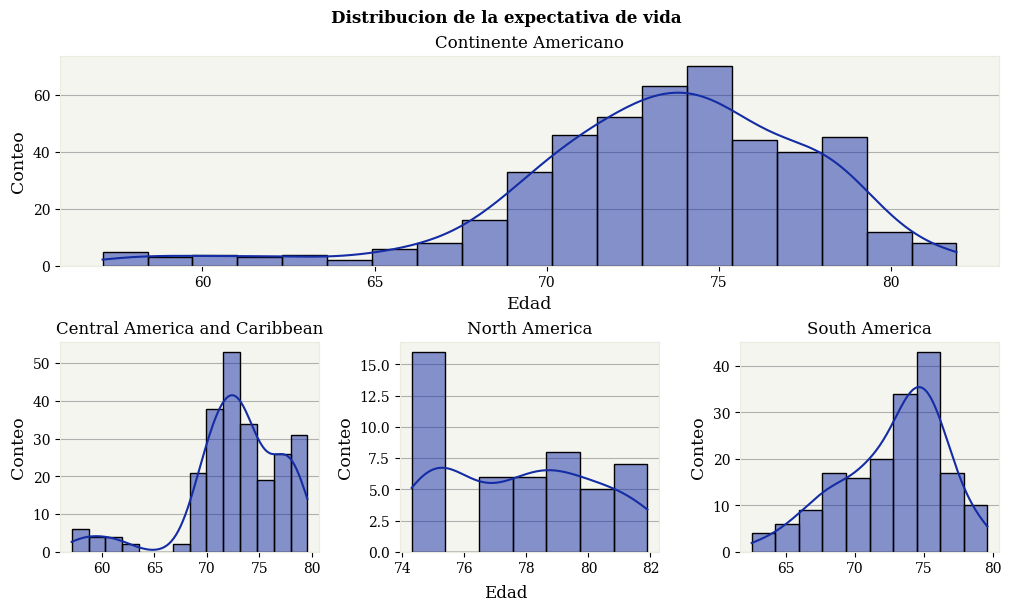

In [ ]:
#Creando la figura
fig = plt.figure( constrained_layout= True)
grid = GridSpec(ncols= 3, nrows= 2, figure= fig)

#Titulo de la figura
plt.suptitle('Distribucion de la expectativa de vida', weight='bold')

#Creando la figura
ax = fig.add_subplot(grid[0, :])
fig.supxlabel('Edad', size= 12)

#Editando el titulo
ax.set_title('Continente Americano', size= 12)

#Creando el histograma de la expectativa de vida en todo el continente
sns.histplot(data=df, x='Life_expectancy', kde=True, ax= ax)

#Editando las etiquetas.
ax.grid(axis='y')
ax.set_xlabel('Edad')
ax.set_ylabel('Conteo')

#Creando los histogramas divididos por region
for i, region in enumerate(sorted(df['Region'].unique())):
  ax = fig.add_subplot(grid[1,i])

  ax.set_title(region, size= 12)
  sns.histplot(data= df[df['Region'] == region], x= 'Life_expectancy',
               kde= True,)

  ax.grid(axis='y')
  ax.set_xlabel('')
  ax.set_ylabel('Conteo')

plt.show()

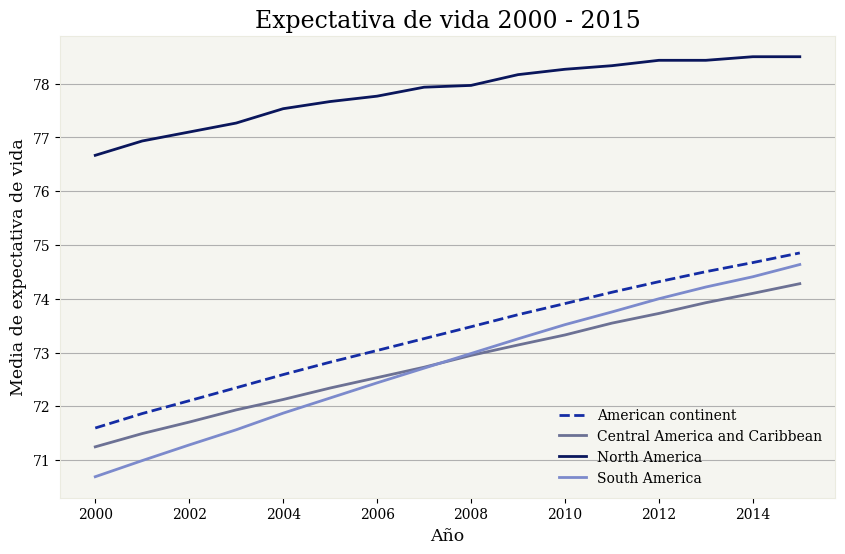

In [ ]:
continente = df.groupby('Year')['Life_expectancy'].mean()

fig, ax = plt.subplots()

#Creadon un grafico de linea de la media de la expectativa de vida
ax.plot(continente.index, continente.values, label= 'American continent',
        ls= '--', linewidth= 2)

#Creando un grafico de linea para cada una de las regiones de america
for region in sorted(df['Region'].unique()):
  region_data = df[df.Region == region] #Filtando la data
  #Agrupando la data
  region_data = region_data.groupby('Year')['Life_expectancy'].mean()

  #Dibuando la linea
  ax.plot(region_data.index, region_data.values, label= region, linewidth = 2)

#Ajustando las etiquetas de la figura
ax.set_xlabel('Año')
ax.set_ylabel('Media de expectativa de vida')
ax.set_title('Expectativa de vida 2000 - 2015')

plt.legend(frameon= False)
plt.grid(axis= 'y')
plt.show()

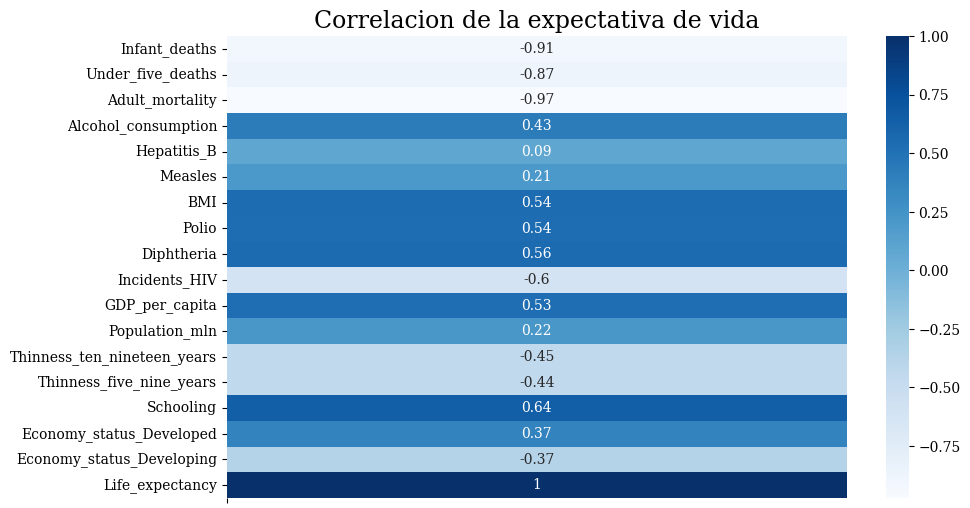

In [ ]:
#Transformamos el vector a un vector columna.
corr_vec = corr_matriz_continiente.loc['Life_expectancy'].values.reshape(-1,1)

plt.title('Correlacion de la expectativa de vida')

#Creando el heatmap
sns.heatmap(corr_vec, annot= True, cmap="Blues")

#Agregando el nombre de la variable al eje Y
plt.yticks([i+0.5 for i in range(18)], corr_matriz_continiente.index,
           rotation= 360)
#Eliminando la etiqueta del eje x
plt.xticks([0])

plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


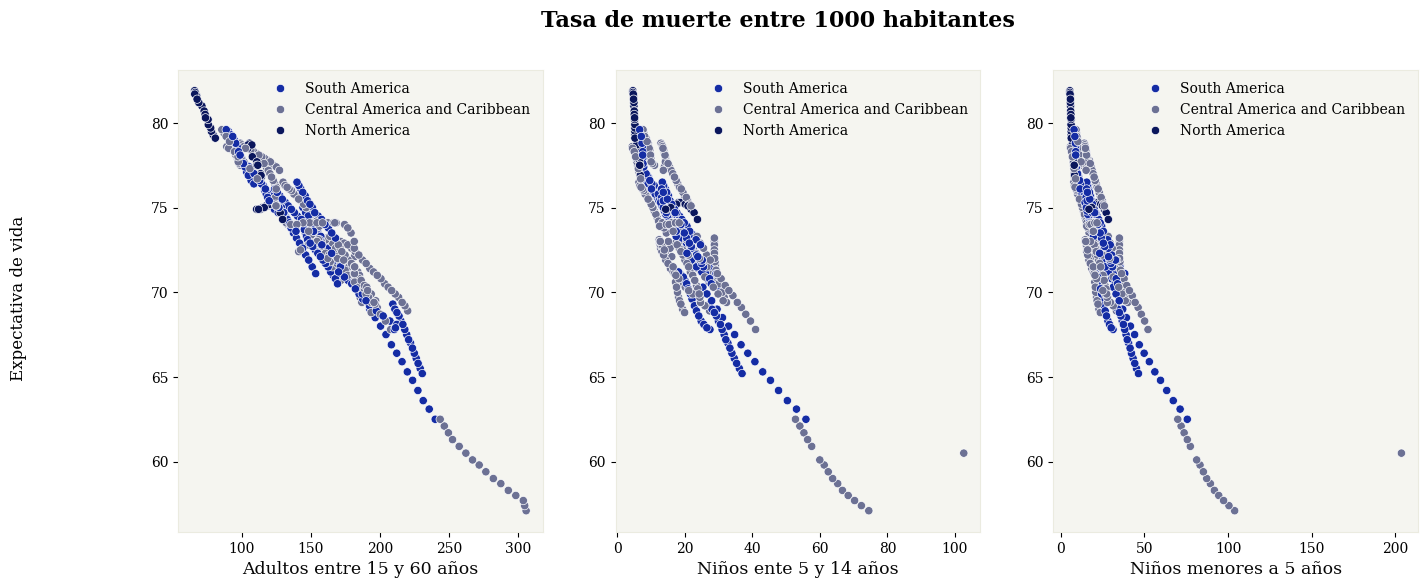

In [ ]:
#Creando la figura
grid = GridSpec(ncols=3, nrows=1)
fig = plt.figure(constrained_layout= True, figsize=(16,6))

#Realicando un scatterpot por cada estadistica
for i, tasa in enumerate(sorted(tasa_de_mortalidad)):
  ax = fig.add_subplot(grid[:, i])

  #Creando scatterplots de la tasas de mortalidad
  sns.scatterplot(data= df, x=tasa, y='Life_expectancy',
                    hue= 'Region', ax= ax)

  #Editando la etiqueta de las figuras
  ax.set_ylabel('')
  ax.set_xlabel(sorted(mortalidad_x_label)[i])

  #Quitandole el cuadro a la legenda
  plt.legend(frameon= False)

#Ajustando la etiqueta de la figura
fig.supylabel('Expectativa de vida', size= 12)
#Ajustando el titulo de lafigura
plt.suptitle('Tasa de muerte entre 1000 habitantes', weight= 'bold', size= 16)
plt.show()

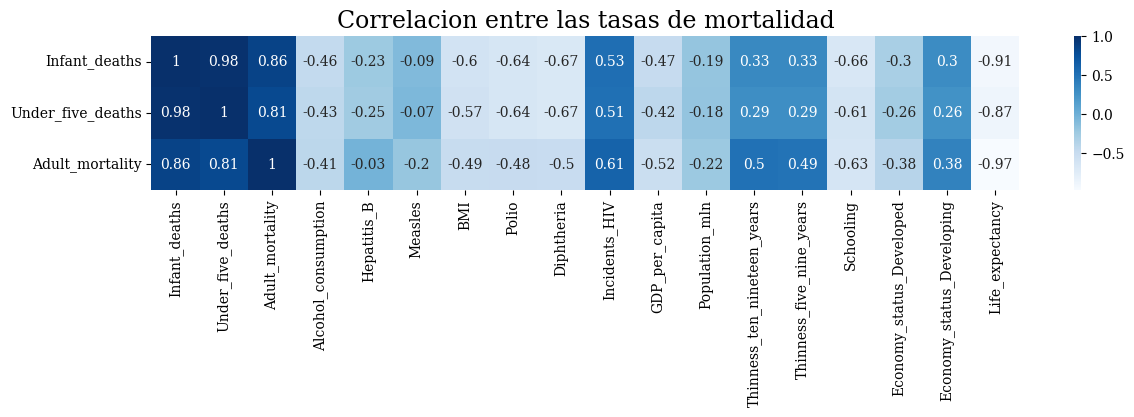

In [ ]:
#Transformamos el vector a un vector columna.
corr_vec = corr_matriz_continiente.loc[['Infant_deaths', 'Under_five_deaths',
                                        'Adult_mortality']]
fig, ax = plt.subplots(figsize= (14,2))

plt.title('Correlacion entre las tasas de mortalidad')

#Creando el heatmap
sns.heatmap(round(corr_vec, 2), annot= True, cmap="Blues", ax= ax)

plt.show()

## insights:

* La distribución de los países norteamericanos exhibe una tendencia hacia la uniformidad. Por otro lado, en el caso de los países de Centroamérica, el Caribe y América del Sur, su distribución se asemeja más a una distribución normal, aunque presentan sesgos significativos.

* Se observa un crecimiento lineal en la expectativa de vida de los países, con una tendencia al alza. Es evidente que los países norteamericanos están por encima del promedio del continente en su conjunto, y también superan a los países de Centroamérica, el Caribe y América del Sur.

* Los países centroamericanos y caribeños superaron a los países centroamericanos en 2008 y continuaron con su tendencia ascendente.

* A medida que la tasa de mortalidad por cada 1000 habitantes aumenta, la expectativa de vida tiende a disminuir. Esta tendencia a la baja es más evidente en los países centroamericanos y caribeños.


In [ ]:
def top_bottom(df_col, titulo, ylabel):
  """
    Esta funcion dibuja dos BoxPlot que muestran los 5 paises con valores mas
    altos y los 5 paises con valores mas bajos.

    Inputs:
          df_col: Columna que se desea visualizar.
          titulo: Titulo de la figura.
          ylabel: Nombre de la etiqueta Y.
  """

  #Creando la figura
  grid = GridSpec(1, 2)
  fig = plt.figure(constrained_layout= True, figsize=(16,6))

  #Ordenando los valores por la media de manera decendente.
  paises = df.groupby('Country').agg({df_col : 'mean'})\
    .sort_values(by= df_col, ascending= False).index

  #Dibujando el boxplot de los 5 primeros
  ax = fig.add_subplot(grid[0,0])
  ax.set_title('Top 5 ')
  ax.set_xlabel('')
  ax.set_ylabel(ylabel)
  sns.boxplot(data= df[df['Country'].isin(paises[:5])],
              x= 'Country', y= df_col, ax= ax)

  #Dibujando el boxplot de los 5 ultimos
  ax = fig.add_subplot(grid[0,1])
  ax.set_title('Bottom 5 ')
  ax.set_xlabel('')
  ax.set_ylabel(ylabel)
  sns.boxplot(data= df[df['Country'].isin(paises[-5:])],
              x= 'Country', y= df_col, ax= ax)

  #Ajustando el tamaño de las etiquetas
  fig.supxlabel('Pais', size= 14)
  fig.suptitle(titulo, size= 16,
               weight= 'bold')

  plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


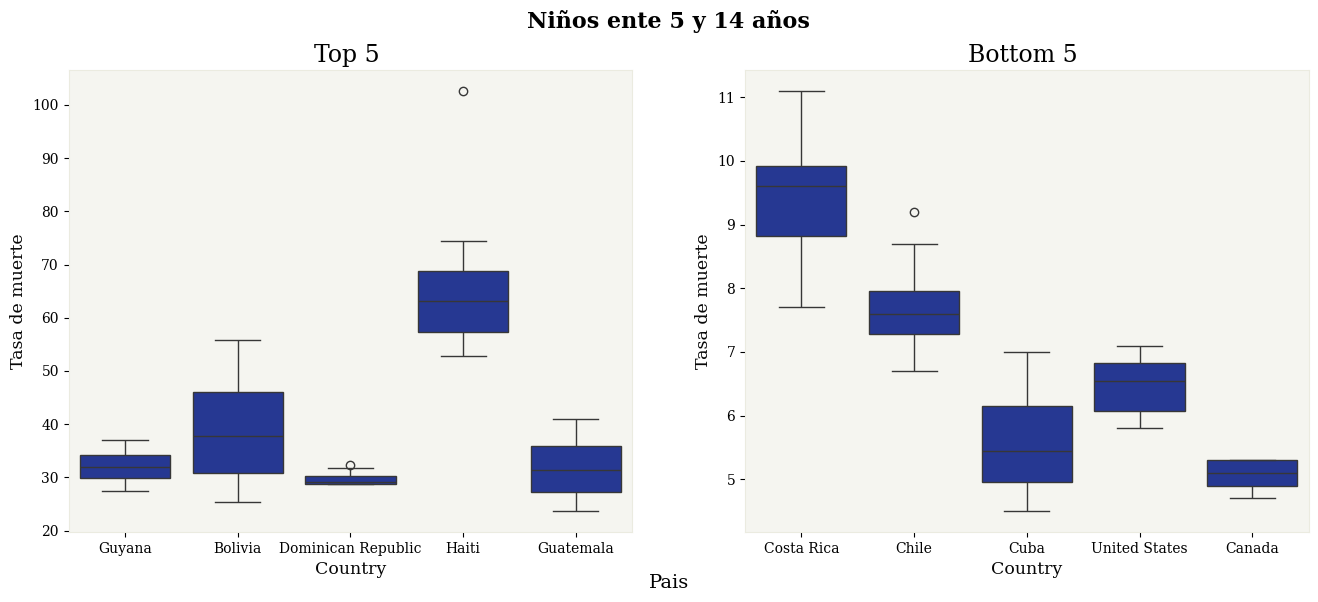

In [ ]:
top_bottom('Infant_deaths', mortalidad_x_label[1],
           'Tasa de muerte')

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


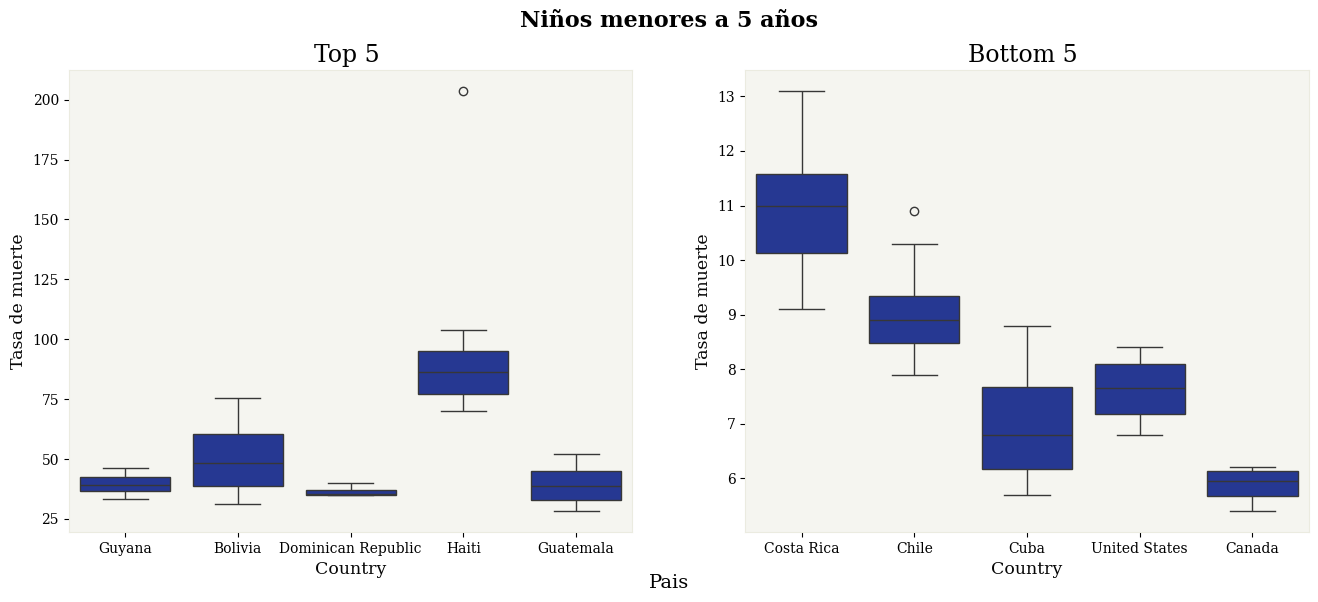

In [ ]:
top_bottom('Under_five_deaths', mortalidad_x_label[0],
           'Tasa de muerte')

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


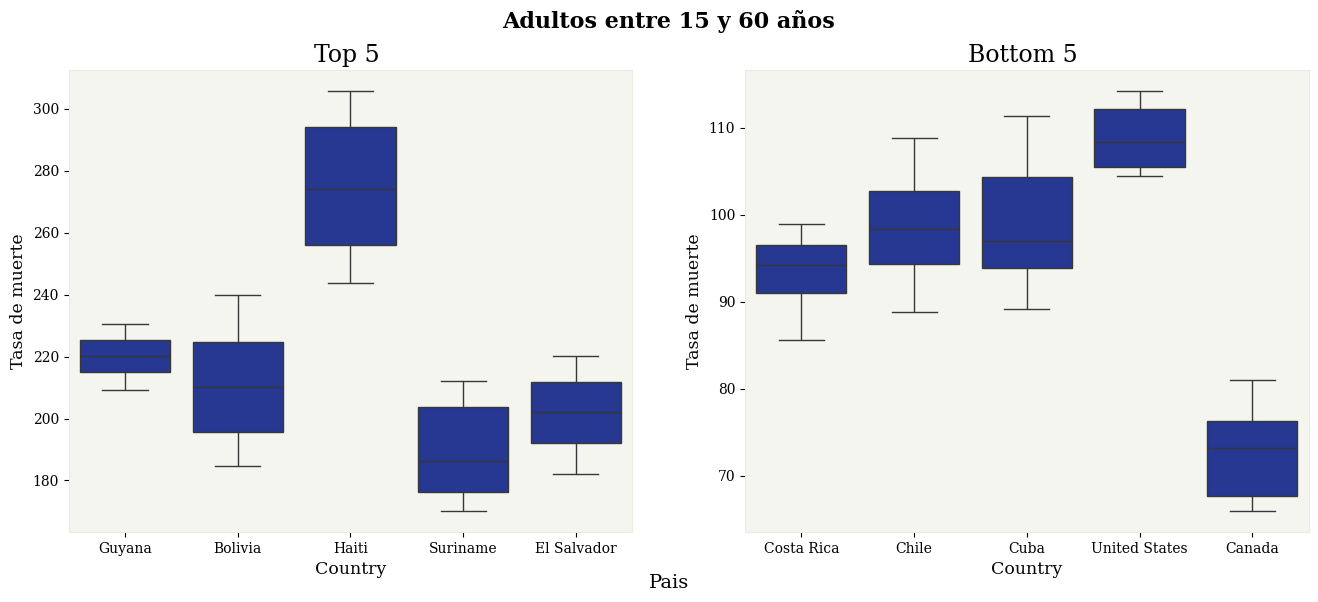

In [ ]:
top_bottom('Adult_mortality', mortalidad_x_label[2], 'Tasa de muerte')

## Insights:

* Haiti es el pais con mayor tasa entre las tres categorias de tasas de muerte.

* Por otro lado Canada es la que cuenta con la menor tasa en las tres categorias.

In [ ]:
def modelo_lineal_general(target, df):
  """
    Esta funcion crea un modelo lineal generalizado para verificar la
    significancia de los features de las variables predictoras.

    Inputs:
          target: columna objetivo.
          df: DataFrame donde se encuentra la data.
  """

  #Eliminando columnas irrelevantes
  drop_cols = ['Life_expectancy','Thinness_ten_nineteen_years',
              'Thinness_five_nine_years', 'Economy_status_Developing' ,target,]
  #Dividiendo features y objetivo
  Y = df[target]
  x = df.drop(drop_cols, axis= 1)
  #Entrenendo el modelo
  model = sm.GLM(Y, x,sm.families.Gamma()).fit()
  #Imprimiendo los resultados
  print(model.summary())

In [ ]:
modelo_lineal_general('Life_expectancy', df[col_num])

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Life_expectancy   No. Observations:                  464
Model:                            GLM   Df Residuals:                      450
Model Family:                   Gamma   Df Model:                           13
Link Function:           InversePower   Scale:                      0.00060130
Method:                          IRLS   Log-Likelihood:                -921.49
Date:                Thu, 21 Mar 2024   Deviance:                      0.26905
Time:                        22:28:28   Pearson chi2:                    0.271
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9945
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Infant_deaths           

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [ ]:
modelo_lineal_general('Infant_deaths', df[col_num])

                 Generalized Linear Model Regression Results                  
Dep. Variable:          Infant_deaths   No. Observations:                  464
Model:                            GLM   Df Residuals:                      451
Model Family:                   Gamma   Df Model:                           12
Link Function:           InversePower   Scale:                          1.1715
Method:                          IRLS   Log-Likelihood:                -1861.9
Date:                Thu, 21 Mar 2024   Deviance:                       82.066
Time:                        22:28:31   Pearson chi2:                     528.
No. Iterations:                    12   Pseudo R-squ. (CS):            0.06027
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Under_five_deaths       

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [ ]:
modelo_lineal_general('Adult_mortality', df[col_num])

                 Generalized Linear Model Regression Results                  
Dep. Variable:        Adult_mortality   No. Observations:                  464
Model:                            GLM   Df Residuals:                      451
Model Family:                   Gamma   Df Model:                           12
Link Function:           InversePower   Scale:                        0.026618
Method:                          IRLS   Log-Likelihood:                -2117.3
Date:                Thu, 21 Mar 2024   Deviance:                       11.626
Time:                        22:28:32   Pearson chi2:                     12.0
No. Iterations:                     7   Pseudo R-squ. (CS):             0.8966
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Infant_deaths           

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


## Insights:
* Los valores que son estadisticamente relevantes para predecir la expectativa de vida son:   
  *  Infant_deaths
  *  Adult_mortality
  *  Alcohol_consumption
  *  Measles
  *  BMI
  *  Polio
  *  GDP_per_capita
  *  Population_mln
  *  Schooling
  *  Economy_status_Developed

* Los valores que son estadisticamente relevantes para predecir la tasa de mortalidad de niños entre 5 y 15 años son:   
  * Under_five_deaths
  * Measles
  * Diphtheria
  * BMI

* Los valores que son estadisticamente relevantes para predecir la tasa de mortalidad de adultos entre 15 y 64 años son:   
  * Infant_deaths
  * Under_five_deaths
  * Hepatitis_B
  * Measles  
  * BMI
  * Polio
  * Diphtheria
  * Incidents_HIV

* El modelo predictorio de la expectativa de vida tiene un R² de 0.9945.

In [ ]:
significant_cols = ['Infant_deaths',
                  'Adult_mortality',
                  'Alcohol_consumption',
                  'Measles',
                  'BMI',
                  'Polio',
                  'GDP_per_capita',
                  'Population_mln',
                  'Schooling',
                  'Economy_status_Developed',]

In [ ]:
for col in significant_cols:
  temp_df = df[col_num].drop(columns= col, axis= 1)
  print('-'*15, f'Resultados eliminando {col}', '-'*15)
  print(modelo_lineal_general('Life_expectancy', temp_df))

--------------- Resultados eliminando Infant_deaths ---------------
                 Generalized Linear Model Regression Results                  
Dep. Variable:        Life_expectancy   No. Observations:                  464
Model:                            GLM   Df Residuals:                      451
Model Family:                   Gamma   Df Model:                           12
Link Function:           InversePower   Scale:                      0.00065256
Method:                          IRLS   Log-Likelihood:                -936.71
Date:                Thu, 21 Mar 2024   Deviance:                      0.28708
Time:                        22:28:37   Pearson chi2:                    0.294
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9912
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name

Resultados eliminando Economy_status_Developed ---------------
                 Generalized Linear Model Regression Results                  
Dep. Variable:        Life_expectancy   No. Observations:                  464
Model:                            GLM   Df Residuals:                      451
Model Family:                   Gamma   Df Model:                           12
Link Function:           InversePower   Scale:                      0.00062495
Method:                          IRLS   Log-Likelihood:                -931.28
Date:                Thu, 21 Mar 2024   Deviance:                      0.28069
Time:                        22:28:38   Pearson chi2:                    0.282
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9930
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [ ]:
r_cuadrado = {'Columnas' : ['Infant_deaths', 'Adult_mortality',
                            'Alcohol_consumption', 'Measles',
                            'BMI', 'Polio', 'GDP_per_capita',
                            'Population_mln', 'Schooling',
                              'Economy_status_Developed'],
              'Valores' : [0.9912, 0.9777, 0.9935, 0.9927,
                           0.5955, 0.9935, 0.9917, 0.9942,
                            0.9938, 0.993 ]}

r_cuadrado = pd.DataFrame(r_cuadrado)

r_cuadrado['Valores'] = (1 - r_cuadrado['Valores']) * 100

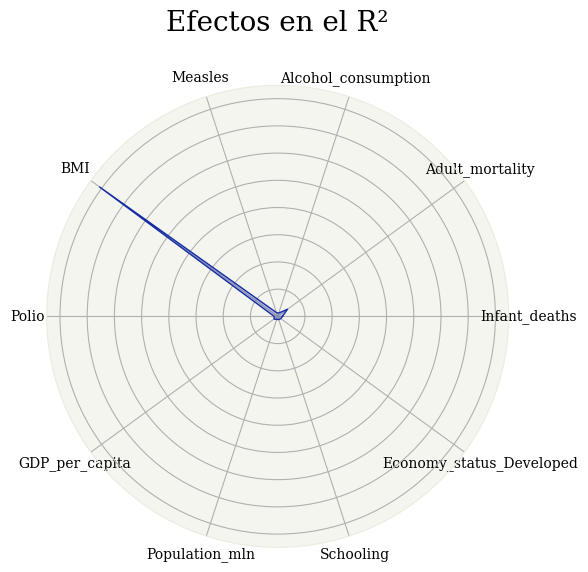

In [ ]:
# Cantidad de variables y su nombre
labels = np.array(r_cuadrado['Columnas'])
num_vars = len(labels)

# Valores a plotear
values = np.array(r_cuadrado['Valores'])

def radar_chart(ax, values, title):
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values = np.concatenate((values,[values[0]]))
    angles += angles[:1]

    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    ax.set_title(title, size=20, color='black', y=1.1)

# Creando la figura y axis
fig, ax = plt.subplots(subplot_kw=dict(polar=True))
radar_chart(ax, values, "Efectos en el R²")

# Ploteando
plt.show()

# Conclusiones





Las principales variables para predecir la expectativa de vida son:
* Infant_deaths
* Adult_mortality
* Alcohol_consumption
* Measles
* BMI
* Polio
* GDP_per_capita
* Population_mln
* Schooling
* Economy_status_Developed

Sin embargo para poder predecir la tasa de mortalidad infantil podemos usar las siguientes variables:

* Under_five_deaths
* Measles
* Diphtheria
* BMI

Y para poder predecir la mortalidad de adulto se pueden usar las variables:

  * Infant_deaths
  * Under_five_deaths
  * Hepatitis_B
  * Measles  
  * BMI
  * Polio
  * Diphtheria
  * Incidents_HIV

Por lo que podriamos decir que las variables significativas para predecir la expectativa de vida son:
* Infant_deaths
* Adult_mortality
* Alcohol_consumption
* GDP_per_capita
* Population_mln
* Schooling
* Economy_status_Developed

Siendo la mortalidad de adultos y la mortalidad de infantes las mas importantes.